In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Banglore_traffic_Dataset.csv')
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [ ]:
#Public Transport usage
avg = df['Public Transport Usage'].mean()
print("Avergae use of Public transport is: ", avg)

Avergae use of Public transport is:  45.0866507164033


In [ ]:
#Median travel Time Index
median = df['Travel Time Index'].median()
print("Median travel time index is: ", median)

Median travel time index is:  1.5


In [ ]:
#Mode of Travel Time Index
mode = df['Travel Time Index'].mode()
print("Mode of Travel Time Index is: ", mode)

Mode of Travel Time Index is:  0    1.5
Name: Travel Time Index, dtype: float64


In [ ]:
#Standard Deviation and Variance of Travel Time Index
std = df['Travel Time Index'].std()
vars  = df['Travel Time Index'].var()
print("Variance of Travel Time Index is: ", vars)
print("Standard Deviation of Travel Time Index is: ", std)

Variance of Travel Time Index is:  0.027330398425985527
Standard Deviation of Travel Time Index is:  0.16531908064704912


In [ ]:
df['Area Name'].value_counts()

,count
Area Name,
Indiranagar,1720
M.G. Road,1501
Koramangala,1364
Jayanagar,1173
Hebbal,950
Whitefield,942
Yeshwanthpur,734
Electronic City,552


In [ ]:
#Using popular areas in Bengaluru
df_graph = df[df['Area Name'].isin(['Indiranagar','Electronic City','Whitefield'])]
df_graph.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
12,2022-01-02,Indiranagar,100 Feet Road,22050,52.870846,1.130160,78.429828,100.000000,3,94.100,35.740106,70.608095,62.199482,115,Fog,No
13,2022-01-02,Indiranagar,CMH Road,37877,26.428424,1.500000,100.000000,100.000000,1,125.754,75.832101,98.157143,95.743220,96,Overcast,No


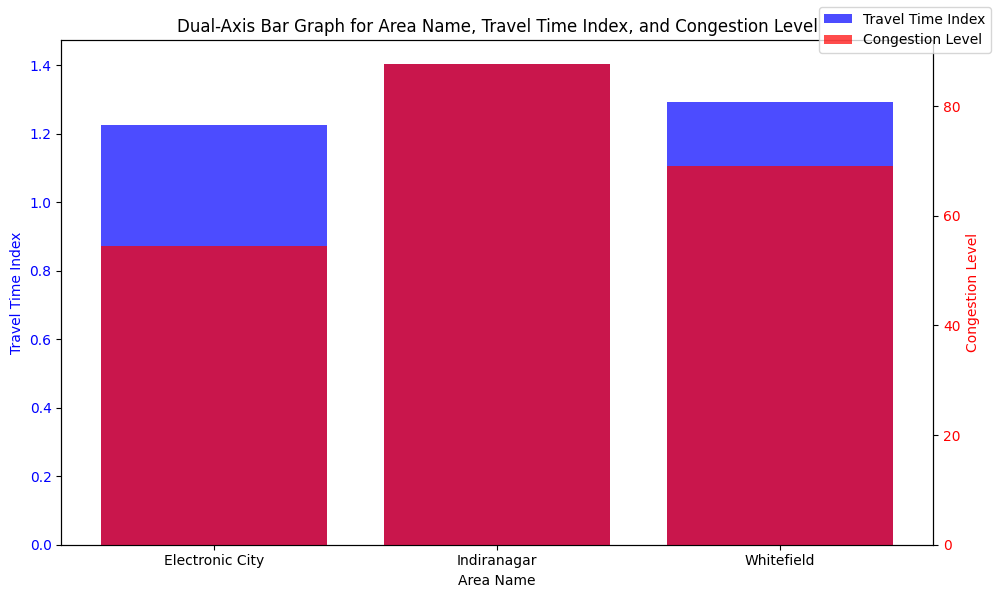

In [ ]:
import matplotlib.pyplot as plt
# Group the data by 'Area Name' and calculate the average 'Travel Time Index' and 'Congestion Level'
grouped_data = df_graph.groupby('Area Name')[['Travel Time Index', 'Congestion Level']].mean()

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # Create a secondary y-axis

# Bar plot for 'Travel Time Index'
ax1.bar(grouped_data.index, grouped_data['Travel Time Index'], color='blue', alpha=0.7, label='Travel Time Index')
ax1.set_xlabel('Area Name')
ax1.set_ylabel('Travel Time Index', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Bar plot for 'Congestion Level'
ax2.bar(grouped_data.index, grouped_data['Congestion Level'], color='red', alpha=0.7, label='Congestion Level')
ax2.set_ylabel('Congestion Level', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a legend
fig.legend(loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.title('Dual-Axis Bar Graph for Area Name, Travel Time Index, and Congestion Level')
plt.tight_layout()
plt.show()